<a href="https://colab.research.google.com/github/arjun-venugopal/Deep-Learning---Projects/blob/main/Elephant_image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
import PIL
import tensorflow as tf

In [ ]:
train_data = pathlib.Path('/content/drive/MyDrive/DATA SICENCE/Elephant/train-Elephant/train')
test_data = pathlib.Path('/content/drive/MyDrive/DATA SICENCE/Elephant/test-Elephant/test')

In [ ]:
train_image_count = len(list(train_data.glob('*/*')))
test_image_count = len(list(test_data.glob('*/*')))
print(train_image_count)
print(test_image_count)

640
188


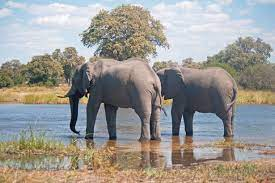

In [ ]:
african = list(train_data.glob('African/*'))
PIL.Image.open(str(african[20]))

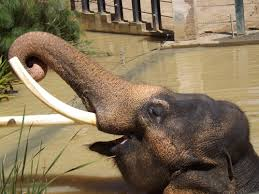

In [ ]:
asian = list(train_data.glob('Asian/*'))
PIL.Image.open(str(asian[20]))

In [ ]:
from os.path import dirname
#creating generatores for training dataset

train_dataset = tf.keras.utils.image_dataset_from_directory(
   directory = '/content/drive/MyDrive/DATA SICENCE/Elephant/train-Elephant/train',
   labels = 'inferred',
   label_mode = 'int',
   batch_size = 32,
   image_size = (256,256)

)

#creating generatores for tseting dataset

validation_dataset = tf.keras.utils.image_dataset_from_directory(
   directory = '/content/drive/MyDrive/DATA SICENCE/Elephant/test-Elephant/test',
   labels = 'inferred',
   label_mode = 'int',
   batch_size = 32,
   image_size = (256,256)

)

Found 640 files belonging to 2 classes.
Found 188 files belonging to 2 classes.


In [ ]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['African', 'Asian']


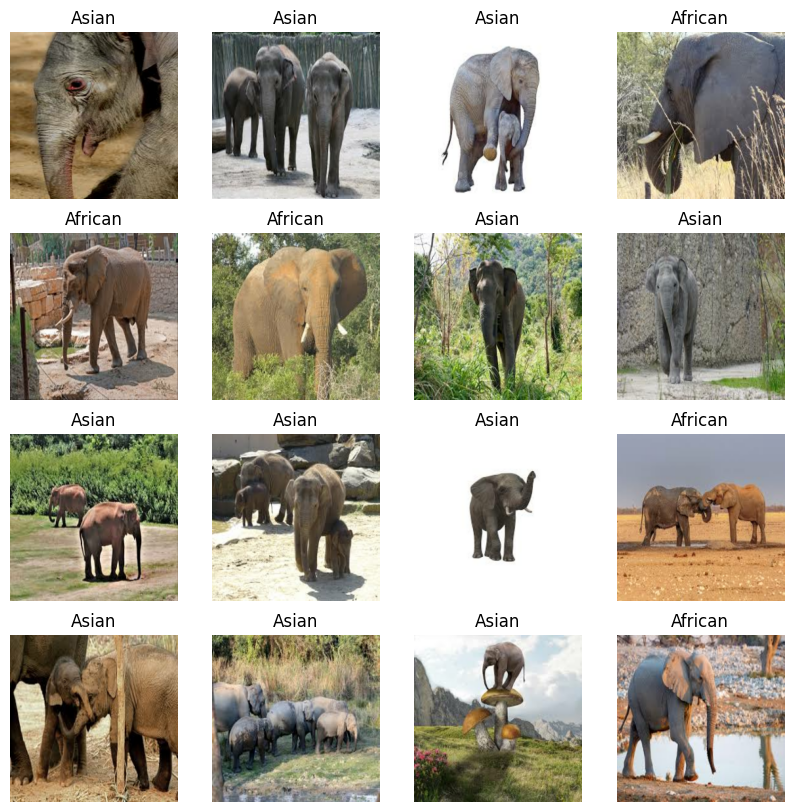

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
columns = 4
rows = 4
for images, labels in train_dataset.take(1):
  for i in range(1,columns*rows + 1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomCrop(256,256),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

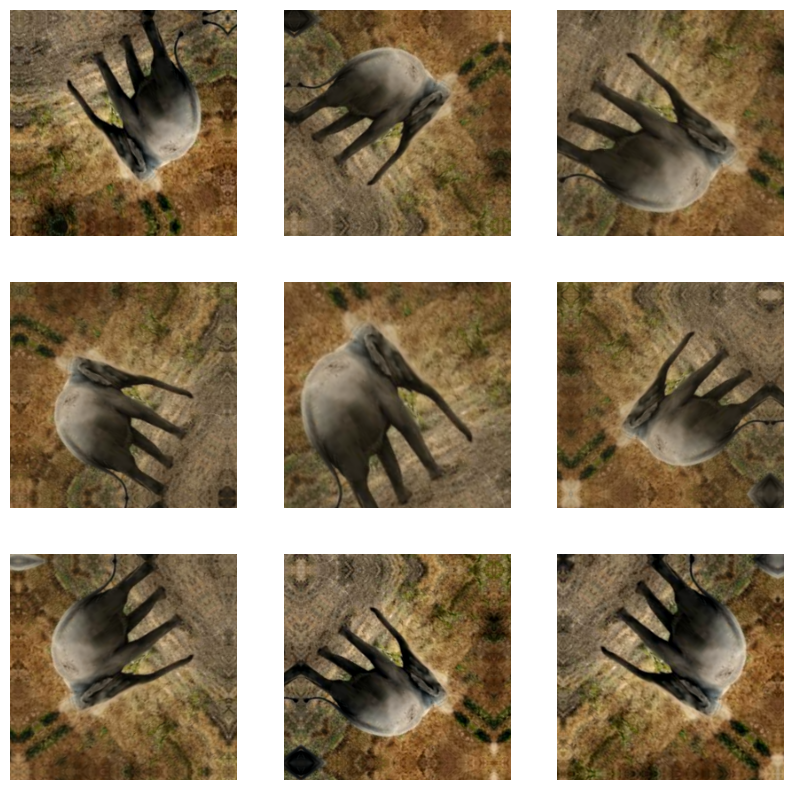

In [ ]:
plt.figure(figsize = (10,10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')
plt.show()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D

# creating a cnn model
model = Sequential()

# First Conv Block
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Second Conv Block
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Third Conv Block
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Fourth Conv Block
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Global Average Pooling instead of Flatten
model.add(GlobalAveragePooling2D())

#flatten layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              

 Total params: 431,553 (1.65 MB)

 Trainable params: 430,593 (1.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(train_dataset,epochs=20, batch_size=32,validation_data=validation_dataset)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 280s 11s/step - accuracy: 0.5711 - loss: 0.7384 - val_accuracy: 0.4840 - val_loss: 4.7988
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 243s 10s/step - accuracy: 0.6920 - loss: 0.6161 - val_accuracy: 0.4840 - val_loss: 1.8598
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 197s 10s/step - accuracy: 0.6468 - loss: 0.6595 - val_accuracy: 0.4840 - val_loss: 2.0035
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 206s 10s/step - accuracy: 0.6661 - loss: 0.6521 - val_accuracy: 0.4840 - val_loss: 2.2441
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 197s 10s/step - accuracy: 0.6716 - loss: 0.6160 - val_accuracy: 0.4947 - val_loss: 1.1340
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 195s 10s/step - accuracy: 0.6715 - loss: 0.6096 - val_accuracy: 0.5266 - val_loss: 0.7419
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 197s 10s/step - accuracy: 0.6446 - loss: 0.6284 - val_accuracy: 0.4787 - val_loss: 1.3948
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 200s 10s/step - accuracy: 0.6800 - loss: 0.5938 - val_accuracy: 0.

In [ ]:
#loss,accuracy = model.evaluate(validation_dataset)
#print(f'Test accuracy :{accuracy*100}')
#print(f'Test loss :{loss}')

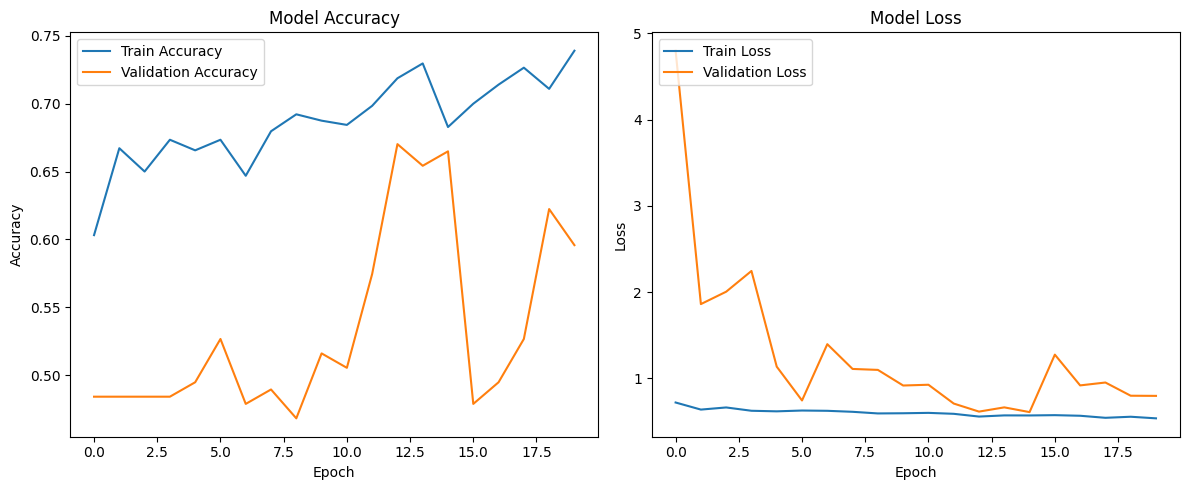

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted class: Asian


<ipython-input-22-b047908f31d4>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(prediction[0] > 0.5)  # Assuming binary classification


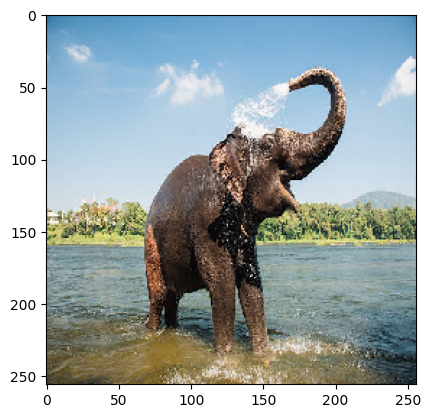

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

def predict_elephant(image_path):

    # Load and preprocess the image
    img = load_img(image_path, target_size=(256, 256))
    img_arr = img_to_array(img) / 255.0  # Normalize the pixel values
    img_arr = tf.expand_dims(img_arr, axis=0)  # Add batch dimension

    # Perform prediction
    prediction = model.predict(img_arr)

    # Map prediction to class label
    predicted_label = int(prediction[0] > 0.5)  # Assuming binary classification
    predicted_class = class_names[predicted_label]

    print("Predicted class:", predicted_class)
    plt.imshow(img)
    plt.show()

# Call the function with the correct image path
image_path = "/content/drive/MyDrive/DS IMG/istockphoto-503686732-612x612.jpg"
predict_elephant(image_path)
